# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [5]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

IndentationError: unexpected indent (<ipython-input-3-55a26efd6ef5>, line 3)

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [7]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

### Understanding the structure of the data

In [9]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

IndentationError: unexpected indent (<ipython-input-9-b5033146efc8>, line 2)

In [11]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LearnPython/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

#### Observations: There are 1898 rows and 9 columns


In [15]:
# Write your code here
df.shape

(1898, 9)

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [17]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
data types: <br>
float64 - 1 column<br>
int64   - 4 columns<br>
object  - 4 columns



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [19]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: There are no missing values. Atrleast nothing is set a NaN or none.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [20]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:<br>
Min food preperation time: 20 mins<br>
Avg food preperation time: 27.37 mins<br>
Max food preperation time: 35 mins


### **Question 5:** How many orders are not rated? [1 mark]

In [24]:
# Write the code here
df[df['rating']=='Not given'].shape[0]

736

#### Observations: 736 orders do not have any rating, its marked as 'Not given'


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#Observations:
-  order ID - each row had a unique order ID.
-  customer_ID -
  - there are 1200 unique customers.
  -  416 customers repeated orders, rest ordered only once.
-  restraunt_names - there are 178 unique restraunts in this data set
-  cuisine_type -
  - is a categorial column.
  - Top 4 cuisine types ordered as American, Japanese, Italian followed by Chinese. Rest have more or less similar orders
-  cost_of_order -
  - 312 unique values.
  - Data is right skewed with most of the orders between 10 and 25.
-  day_of_the_week -
  - It is a categorial column with 2 values.
  - Most of the orders are happening during weekend
-  rating - is a categorial column with 4 values where one is a rating 'Not given' (approx 39%) and other 3 as actual rating.
-  food_preparation_time -
  - This ranges from 20 mins to 35 mins.
  - The distribution appears unifoirm, not really a normal distribution, it does not seems skewed, more of a fairly spread out.
-  delivery_time -
  - There is a spresd between 15 and 32.5 mins
  - This appears mutimodal distribution with smaller peak around 15-20 mins and a cluster around 25-30 mins.
  - Most deliverables are happening between 20-30 mins.

In [26]:
# Write the code here
df.nunique()

,0
order_id,1898
customer_id,1200
restaurant_name,178
cuisine_type,14
cost_of_the_order,312
day_of_the_week,2
rating,4
food_preparation_time,16
delivery_time,19


In [42]:
# Since number of customers are 1200, not all ordered repeat order - finding out how many did
value_counts = df['customer_id'].value_counts()

# Filter for values with frequency greater than 1
filtered_values = value_counts[value_counts > 1]

# Count the number of values with frequency greater than 1
count_of_values = len(filtered_values)

print(count_of_values)

416


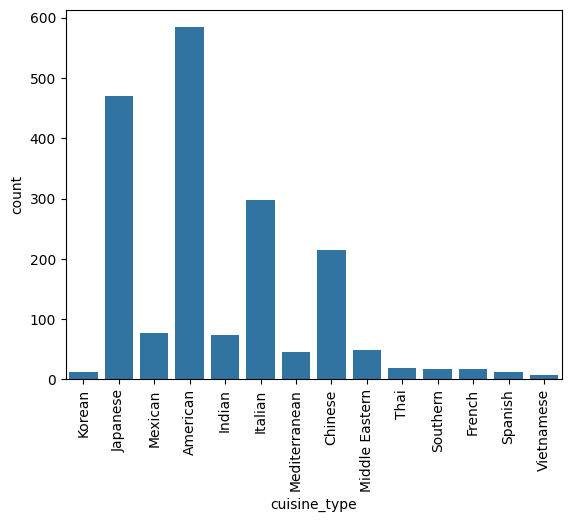

In [41]:
#plotting a countplot for cusine_type as its a categorial columnn with 14 unique values
plt.figure()
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

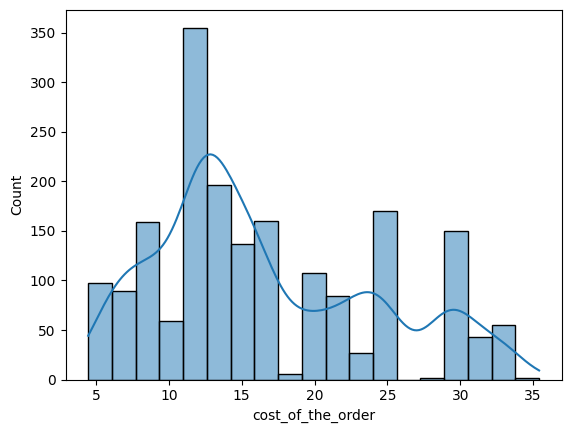

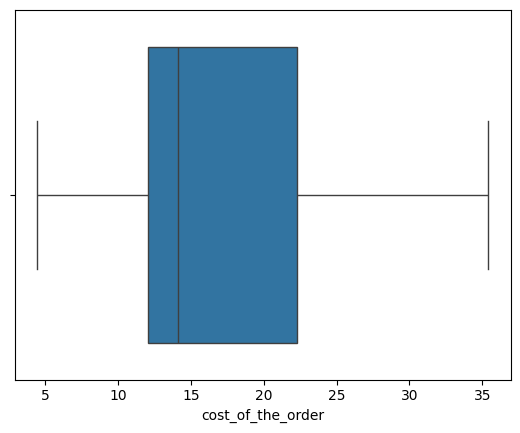

In [44]:
#checking for cost of order - being a numeric value, putting histplot and boxplot to study the same
plt.figure()
sns.histplot(data=df,x='cost_of_the_order',kde=True)
plt.show()
plt.figure()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

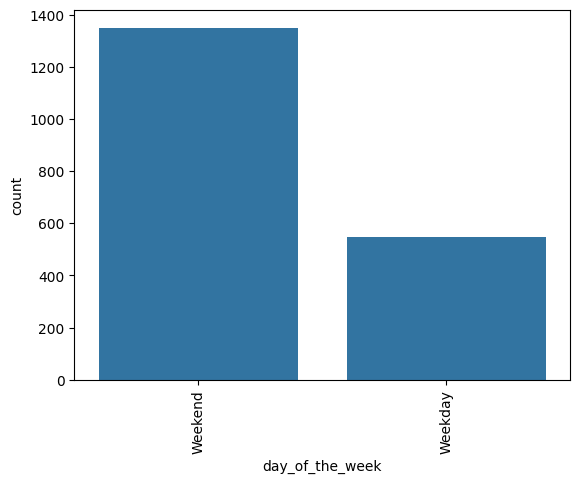

In [45]:
#plotting a countplot for day_of_the_week as its more of a categorial columnn with 2 unique values
plt.figure()
sns.countplot(data=df,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

In [48]:
#rating - finding frequency percebnt for rating
df['rating'].value_counts(normalize=True)*100

,proportion
rating,
Not given,38.777661
5,30.979979
4,20.337197
3,9.905163


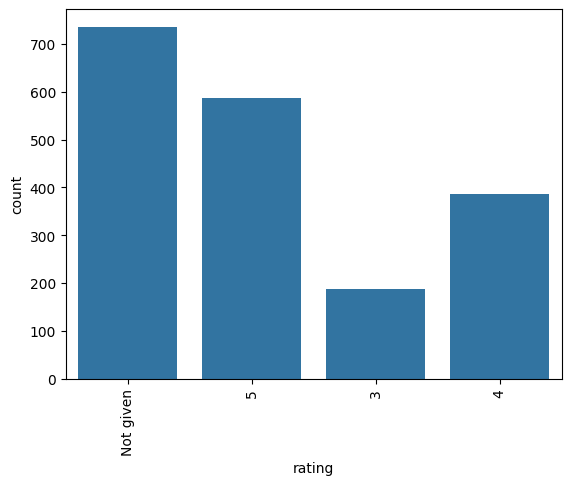

In [46]:
#plotting a countplot for rating as its more of a categorial columnn with 4 unique values
plt.figure()
sns.countplot(data=df,x='rating')
plt.xticks(rotation=90)
plt.show()

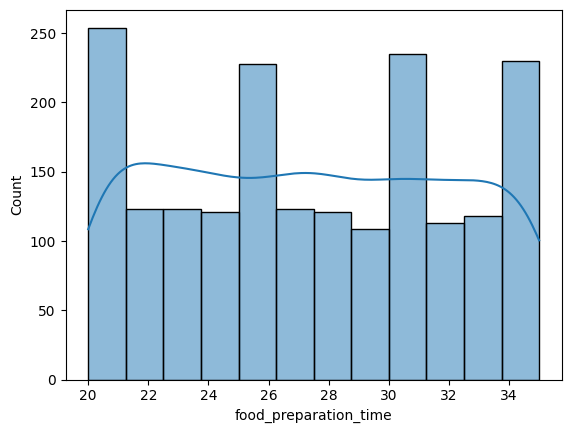

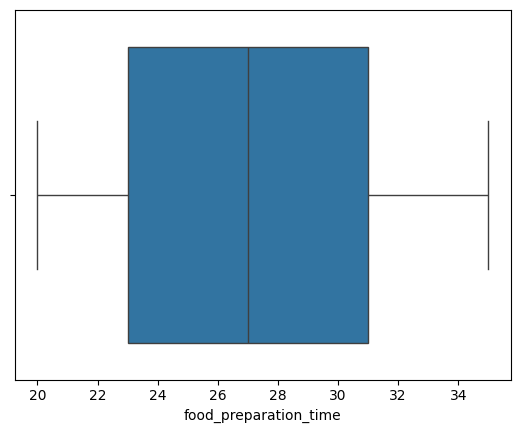

In [49]:
#checking for food preparation time - being a numeric value, putting histplot and boxplot to study the same
plt.figure()
sns.histplot(data=df,x='food_preparation_time',kde=True)
plt.show()
plt.figure()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

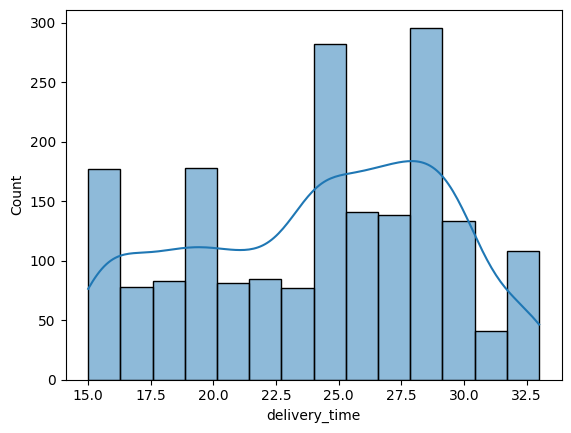

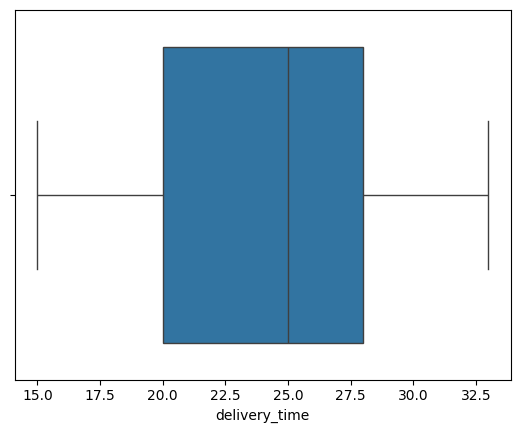

In [50]:
#checking for delivery time - being a numeric value, putting histplot and boxplot to study the same
plt.figure()
sns.histplot(data=df,x='delivery_time',kde=True)
plt.show()
plt.figure()
sns.boxplot(data=df,x='delivery_time')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [52]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:<br>
<b>restaurant_name</b>
-  Shake Shack - 219 orders
-  The Meatball Shop - 132 orders
-  Blue Ribbon Sushi - 119 orders
-  Blue Ribbon Fried Chicken - 96 orders
-  Parm - 68 orders



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [56]:
# Write the code here
most_frequent_value = df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().idxmax()
count = df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().max()

print(f"Most frequent value: {most_frequent_value} (Count: {count})")

Most frequent value: American (Count: 415)


#### Observations: Most frequent value: American (Count: 415)


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [59]:
# Write the code here
percentage = (df['cost_of_the_order'] > 20).mean() * 100
print("Percentage of orders costing more than 20: {percentage:.2f}%")

Percentage of orders costing more than 20: 29.24%


#### Observations: Percentage of orders costing more than 20: 29.24%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [60]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations: Mean delivery time: 24.16 mins


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [61]:
# Write the code here
df['customer_id'].value_counts().nlargest(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
<table>
  <tr>
    <th>customer_id</th>
    <th>count</th>
  </tr>
  <tr>
    <td>52832</td>
    <td>13</td>
  </tr>
  <tr>
    <td>47440</td>
    <td>10</td>
  </tr>
  <tr>
    <td>83287</td>
    <td>9</td>
  </tr>
</table>


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# Write the code here
df_encoded = pd.get_dummies(df, columns=['restaurant_name','cuisine_type','day_of_the_week','rating'], drop_first=True)
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---